In [1]:
'''
Example of a cubic spline graph
'''

In [2]:
import numpy as np
import matplotlib.axes as axes
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline as cs

In [3]:
c = cm.Paired.colors

In [4]:
def despine(ax: axes.Axes) -> None:
    '''
    Remove the top and right spines of a graph.

    There is only one x axis, on the bottom, and one y axis, on the left.
    '''
    for spine in 'right', 'top':
        ax.spines[spine].set_visible(False)

In [5]:
x1 = np.arange(10)  # create x values from 0 to 9, increments of 1
y1 = np.sin(x1)

In [6]:
x2 = np.arange(-0.5, 9.6, 0.1)  # create x values from 0.5 to 9.5, increments of 0.1
y2 = cs(x1, y1)

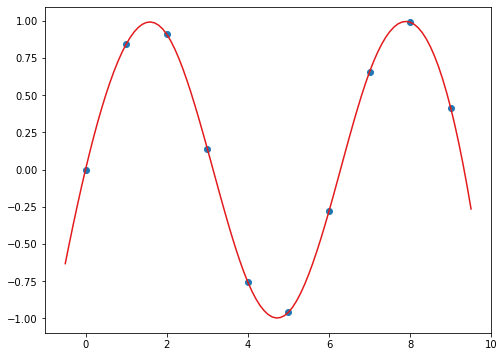

In [7]:
figure_width_height = (8, 6)
fig = plt.figure(figsize=figure_width_height)
ax = fig.add_subplot(111)
plt.plot(x1, y1, marker='o', linestyle='None',
         color=c[1], label='data')
plt.plot(x2, y2(x2), marker='None', linestyle='-',
         color=c[5], label='cubic spline')